# Sprawozdanie do projektu 2
### Danylo Zakharchenko, s196739

Moim zadaniem będzie implementacja i porównanie trzech różnych metod rozwiązania systemów równań liniowych. Zaimplementuję dwi metody iteracyjne: Jacobiego i Gaussa-Siedela oraz metodę bezpośrednią z wykorzystaniem faktoryzacji LU.


In [1]:
from matplotlib import pyplot as plt

from data import generate_A, generate_b
from algorithms import jacobi_method, gauss_seidel_method, direct_method

# Zadanie A

In [2]:
MATRIX_DIMENTIONS = (939, 939)

A = generate_A(MATRIX_DIMENTIONS, 12, -1, -1)
b = generate_b(MATRIX_DIMENTIONS[0])

# Zadanie B


![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/14729abaaebeb851f7eac41e41f04a6666463849)

Dla implementacji algorytmu korzystającego z metody Jacobiego użyłem wzór poelementowy ([element based formula on Wiki](https://en.wikipedia.org/wiki/Jacobi_method#Element-based_formula)).

In [13]:
x_jacobi, iterations_jacobi, error_jacobi = jacobi_method(A, b)

![title](https://wikimedia.org/api/rest_v1/media/math/render/svg/02f26444f4da61ae84a9824a6b5292949a483fcc)

Dla implementacji algorytmu korzystającego z metody Gaussa-Siedla użyłem wzór poelementowy ([element based formula on Wiki](https://en.wikipedia.org/wiki/Gauss–Seidel_method#Element-based_formula)).


In [14]:
x_gauss, iterations_gauss, error_gauss = gauss_seidel_method(A, b)

In [15]:
print("Jacobi iterations: ", iterations_jacobi)
print("Gauss-Siedel iterations: ", iterations_gauss)

Jacobi iterations:  25
Gauss-Siedel iterations:  18


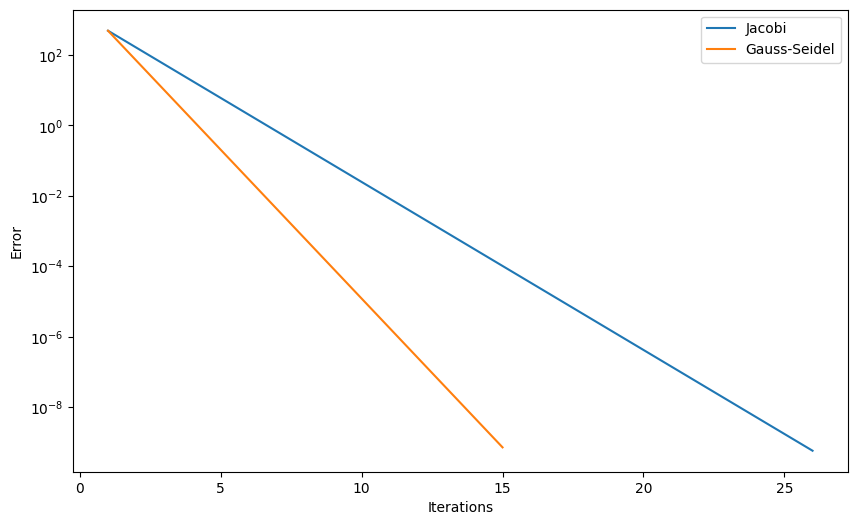

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations_jacobi + 1), error_jacobi)
plt.plot(range(1, iterations_gauss + 1), error_gauss)

plt.xlabel("Iterations")
plt.ylabel("Error")
plt.yscale("log")
plt.legend(["Jacobi", "Gauss-Seidel"])
plt.show()

Jak widać z wykresu metoda Gaussa-Siedela potrzebuje **18** iteracji wtedy jak metoda Jacobiego potrzebuje **26** iteracji. Czas wykonania to **12.9s** dla metody Jacobiego i **8.7s** dla metody Gaussa-Siedela.

# Zadanie C

In [8]:
A = generate_A(MATRIX_DIMENTIONS, 3, -1, -1)
b = generate_b(MATRIX_DIMENTIONS[0])

In [9]:
x_jacobi, iterations_jacobi, error_jacobi = jacobi_method(A, b)

In [10]:
x_gauss, iterations_gauss, error_gauss = gauss_seidel_method(A, b)

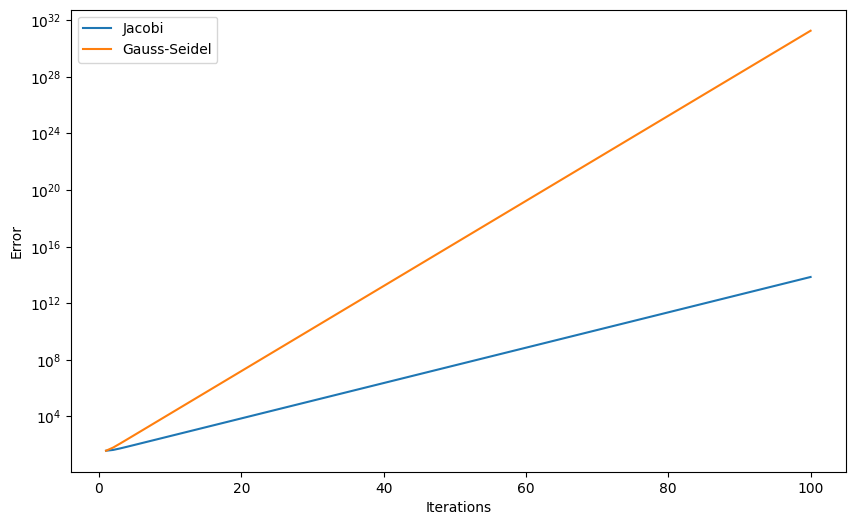

In [11]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, iterations_jacobi + 1), error_jacobi)
plt.plot(range(1, iterations_gauss + 1), error_gauss)

plt.xlabel("Iterations")
plt.ylabel("Error")

plt.legend(["Jacobi", "Gauss-Seidel"])

plt.yscale("log")
plt.show()

Dla takiej macierzy metody iteracyjne nie zbiegają się. 

Jak widzimy z wykresu norma residuum rośnie. Warto zauwarzyć że jak w poprzednim przypadku metoda Gaussa-Siedela szybczej zbiegała się to teraz szybciej rozbiega się.

# Zadanie D

In [12]:
x_direct, error_direct = direct_method(A, b)

In [13]:
print("Direct method error: ", error_direct)

Direct method error:  9.136822946656502e-11


Natomiast rozwiązać taki układ pozwala metoda bezpośrednia. Z tą metodą osiagamy normy residuum 9.13e-9.

# Zadanie E

In [10]:
import time
sizes = [100, 250, 500, 750, 1000, 1250, 1500]

jacobi_times = []
gauss_times = []
direct_times = []

def timeit(func, *args):
    start = time.time()
    func(*args)
    return time.time() - start

for size in sizes:
    A = generate_A((size, size), 12, -1, -1)
    b = generate_b(size)

    jacobi_times.append(timeit(jacobi_method, A, b))
    gauss_times.append(timeit(gauss_seidel_method, A, b))
    direct_times.append(timeit(direct_method, A, b))

In [11]:
print("Average proportion Jacobi and Gauss-Siedel: ", sum(j_t / g_t for j_t, g_t in zip(jacobi_times, gauss_times)) / len(jacobi_times))

1.7733580319884887

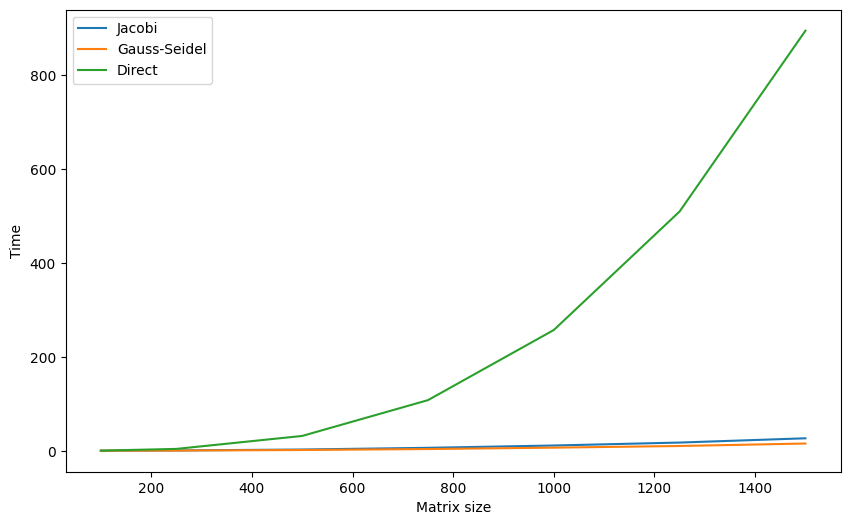

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(sizes, jacobi_times)
plt.plot(sizes, gauss_times)
plt.plot(sizes, direct_times)
plt.xlabel("Matrix size")
plt.ylabel("Time")
plt.legend(["Jacobi", "Gauss-Seidel", "Direct"])
plt.show()

Czas wykonania metody bezpośredniej rośnie bardzo szybko w porównaniu z metodami iteracyjnymi.

# Zadanie F

Porównując metody rozwiązań układów równań liniowych łatwo zobaczyć przewage czasową metod iteracyjnych nad bezpośrednią, 
chociaż nie zawsze te pierwsze zbiegają się. Zgadza się to z złożonością obliczeniową dla poszczególnych algorytmów: dla metody bezpośredniej
jest to O(n<sup>3</sup>) ze względu na kosztowną czasowo faktoryzację LU, dla metod iteracyjnych złożoność wynosi O(n<sup>2</sup>) mnożenie macierzy razy wektor kolumnowy.

Co do porównania dwóch metod iteracyjnych których używałem to na pewno można powiedzieć że metoda Gaussa-Siedela jest lepszą (szybszą) 
od metody Jacobiego. Przewagę tą otrzymuje przez uzywanie zaktualizowanych wartości w bieżącej iteracji a nie czeka kolejnej jak metoda 
Jacobiego. Średnio metoda Jacobiego wymaga 78% więcej czasu wykanania (iteracji) do osiągnięcia kryterium stopu.